In [159]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
from scipy.optimize import curve_fit, root
from scipy.misc import derivative

In [161]:
files = glob('data/*.csv')
files.sort()
files[:4]

['data/h1-1.csv', 'data/h1-2.csv', 'data/h1-3.csv', 'data/h1-4.csv']

In [162]:
df = pd.read_csv(files[0])
df.head()
initial = df.iloc[0]
initial

t    0.000000
x    9.504989
y    0.992146
Name: 0, dtype: float64

In [163]:
df = df.drop(0)
df["t"] = df["t"] - df["t"].iloc[0]
df

,t,x,y
1,0.000000,9.005892,1.128870
2,0.033300,8.006454,1.379240
3,0.066633,6.998123,1.619137
4,0.099967,6.024219,1.851046
5,0.133333,5.032383,2.068561
6,0.166667,4.050332,2.275976
7,0.200033,3.052557,2.472963
8,0.233333,2.087828,2.652618
9,0.266667,1.161084,2.814076
10,0.300000,0.379687,2.976138


In [164]:
def x_func(t, a, b):
    return a * t + b

def y_func(t, a, b, c):
    return a * t**2 + b * t + c

px, _ = curve_fit(x_func, df["t"], df["x"])
py, _ = curve_fit(y_func, df["t"], df["y"])
px, py

(array([-29.08812211,   8.94288055]),
 array([-5.47193935,  7.80625527,  1.12625427]))

In [165]:
vx0 = px[0]
y0 = initial["y"]
dt = (-py[1]+np.sqrt(py[1]**2-4*py[0]*(py[2]-y0)))/(2*py[0])
dt
vy0 = 2*py[0]*dt + py[1]
theta = -np.arctan(vy0/vx0)*180/np.pi
np.sqrt(vx0**2 +vy0**2), theta

(30.166070281801527, 15.363105316313847)

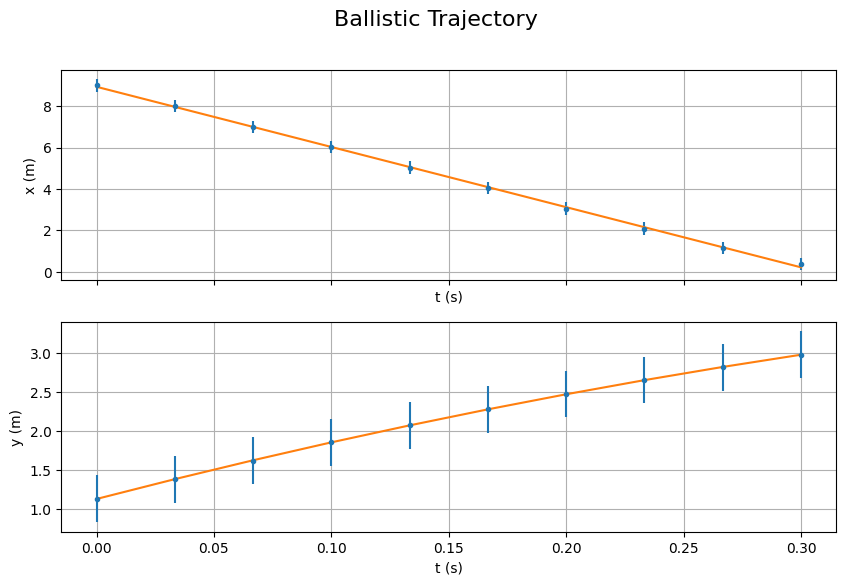

In [166]:
# plot
e = 0.3
fig , axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
axes[0].errorbar(df["t"], df["x"], yerr=e, fmt=".")
axes[0].plot(df["t"], x_func(df["t"], *px), label="fit")
axes[0].set_xlabel("t (s)")
axes[0].set_ylabel("x (m)")
axes[0].grid()
axes[1].errorbar(df["t"], df["y"], yerr=e, fmt=".")
axes[1].plot(df["t"], y_func(df["t"], *py), label="fit")
axes[1].set_xlabel("t (s)")
axes[1].set_ylabel("y (m)")
axes[1].grid()
# fig.tight_layout()
fig.suptitle("Ballistic Trajectory", fontsize=16)
plt.show()

# automation

['data/h5-1.csv', 'data/h5-2.csv', 'data/h5-3.csv', 'data/h5-4.csv', 'data/h5-5.csv', 'data/h5-6.csv']
v0 [ 9.5159273   8.85665703  8.48708983  8.57487586  9.12180644 10.3725096 ]
theta [17.89796281 25.45350513 34.49594083 44.75917073 55.31864743 65.18955933]


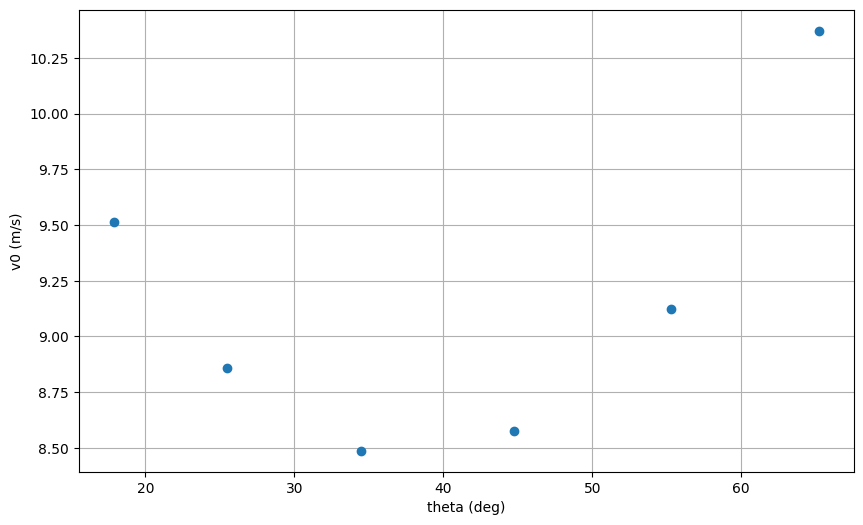

g [-9.61979505 -9.59091384 -9.54966764 -9.6471836  -9.63043501 -9.68229915]
h [5.007995 5.000378 4.992097 4.992001 4.984795 4.998302]
L [9.510438 9.505844 9.506565 9.49555  9.50558  9.505594]


In [197]:
i = 5
files = glob(f'data/h{i}*.csv')
files.sort()
print(files)

v0 = []
theta = []
L = []
h = []
g = []

def x_func(t, a, b):
    return a * t + b

def y_func(t, a, b, c):
    return a * t**2 + b * t + c

for file in files:
  df = pd.read_csv(file)
  df.head()
  initial = df.iloc[0]
  df = df.drop(0)
  df["t"] = df["t"] - df["t"].iloc[0]

  px, _ = curve_fit(x_func, df["t"], df["x"])
  py, _ = curve_fit(y_func, df["t"], df["y"])
  g.append(2*py[0])

  vx0 = px[0]
  y0 = initial["y"]
  h.append(y0)
  L.append(initial["x"])
  dt = (-py[1]+np.sqrt(py[1]**2-4*py[0]*(py[2]-y0)))/(2*py[0])
  vy0 = 2*py[0]*dt + py[1]
  theta_ = -np.arctan(vy0/vx0)*180/np.pi
  v0_ = np.sqrt(vx0**2 +vy0**2)
  v0.append(v0_)
  theta.append(theta_)

v0 = np.array(v0)
theta = np.array(theta)
L = np.array(L)
h = np.array(h)
g = np.array(g)

print("v0", v0)
print("theta", theta)

plt.figure(figsize=(10, 6))
plt.plot(theta, v0, 'o')
plt.ylabel("v0 (m/s)")
plt.xlabel("theta (deg)")
plt.grid()
plt.show()
print("g", g)
print("h", h)
print("L", L)

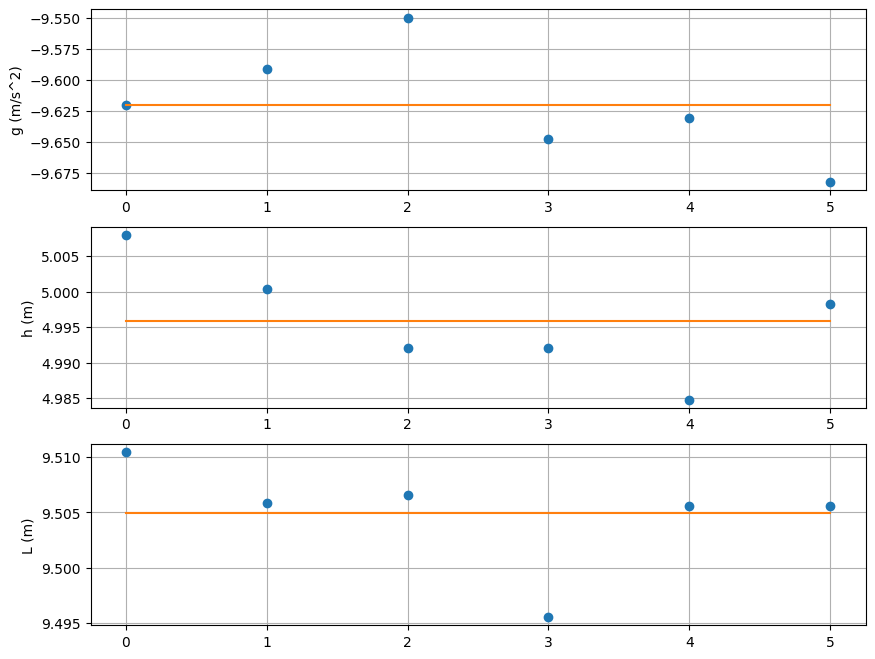

g -9.620049049712893 m/s^2
h 4.995928 m
L 9.5049285 m


In [198]:
xx = np.arange(len(g))

fig, axes = plt.subplots(3, 1, figsize=(10, 8))
axes[0].plot(g, 'o')
axes[0].plot(xx, np.repeat(np.mean(g), len(g)), label="mean")
axes[0].set_ylabel("g (m/s^2)")
axes[0].grid()
axes[1].plot(h, 'o')
axes[1].plot(xx, np.repeat(np.mean(h), len(h)), label="mean")
axes[1].set_ylabel("h (m)")
axes[1].grid()
axes[2].plot(L, 'o')
axes[2].plot(xx, np.repeat(np.mean(L), len(L)), label="mean")
axes[2].set_ylabel("L (m)")
axes[2].grid()
plt.show()
print("g", np.mean(g), "m/s^2")
print("h", np.mean(h), "m")
print("L", np.mean(L), "m")


[-0.23014311 90.4151397 ]


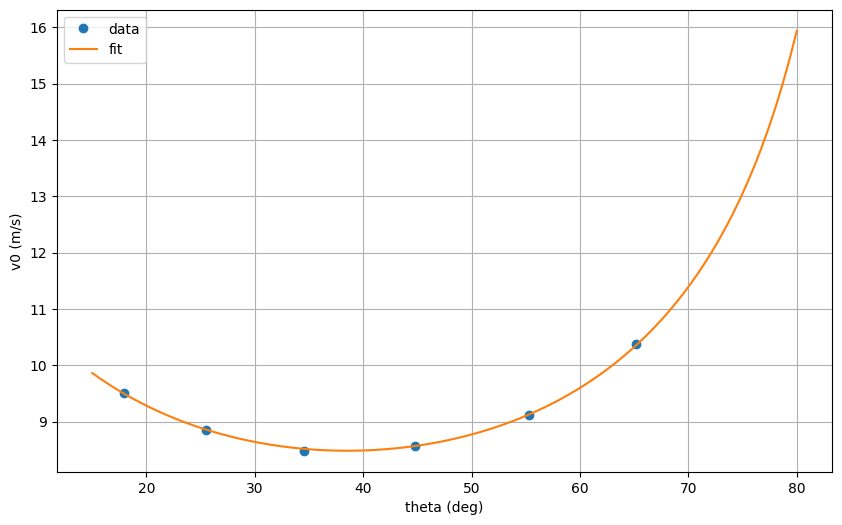

In [199]:
def theta_v0(theta, a, b):
    return np.sqrt(b/(np.sin(2*theta*np.pi/180)-a*(1+np.cos(2*theta*np.pi/180))))

p, _ = curve_fit(theta_v0, theta, v0, p0=(1/10, 10*10))
print(p)
thetas = np.linspace(15, 80, 100)

plt.figure(figsize=(10, 6))
plt.plot(theta, v0, 'o', label="data")
plt.plot(thetas, theta_v0(thetas, *p), label="fit")
plt.ylabel("v0 (m/s)")
plt.xlabel("theta (deg)")
plt.grid()
plt.legend()
plt.show()


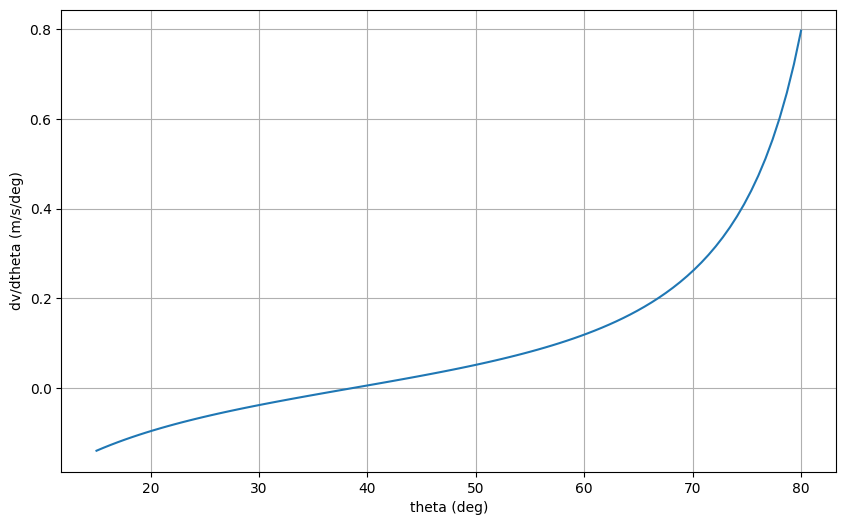

In [200]:
# plot derivative
dv_dtheta = derivative(theta_v0, thetas, dx=1e-6, args=p)
plt.figure(figsize=(10, 6))
plt.plot(thetas, dv_dtheta)
plt.ylabel("dv/dtheta (m/s/deg)")
plt.xlabel("theta (deg)")
plt.grid()
plt.show()

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-8.8817842e-10])
       r: array([-0.0042209])
  status: 1
 success: True
       x: array([38.51972413])


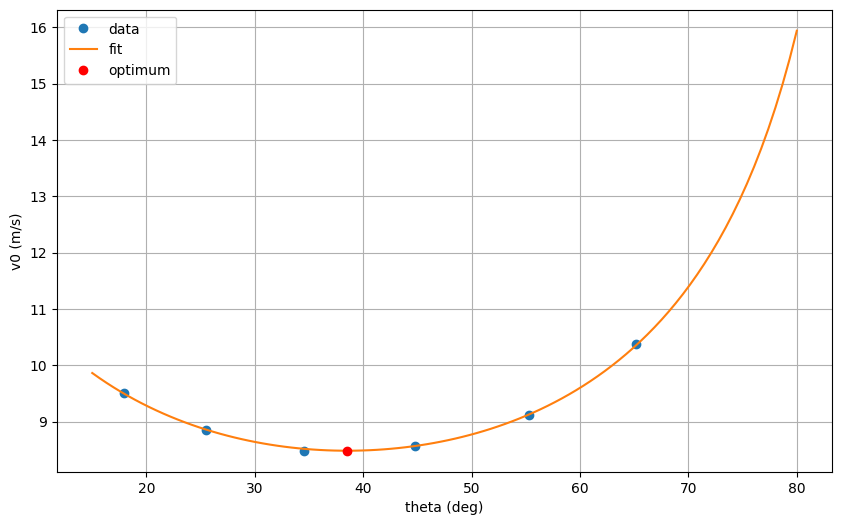

        numeric             |  analityc
theta 38.519724131622645 deg  |  39.07041927384919 deg
v0 8.483530084457312 m/s  |  8.615752735729338 m/s
h' -1.9959280000000001 m


In [201]:
theta_opt = root(lambda theta: derivative(theta_v0, theta, dx=1e-6, args=p), 50)
print(theta_opt)

H = 3 # m

plt.figure(figsize=(10, 6))
plt.plot(theta, v0, 'o', label="data")
plt.plot(thetas, theta_v0(thetas, *p), label="fit")
plt.plot(theta_opt.x, theta_v0(theta_opt.x, *p), 'o', label="optimum", c="red")
plt.ylabel("v0 (m/s)")
plt.xlabel("theta (deg)")
plt.grid()
plt.legend()
plt.show()

theta_opt_analityc = np.arctan(-np.mean(L)/(H-np.mean(h)))*90/np.pi
theta_opt_analityc = theta_opt_analityc if theta_opt_analityc > 0 else theta_opt_analityc + 90

v0_opt_analityc = np.sqrt(-np.mean(g)*((H-np.mean(h))+np.sqrt((H-np.mean(h))**2+np.mean(L)**2)))
print("       ", "numeric           ", " | ", "analityc")
print("theta", f"{theta_opt.x[0]} deg", " | ", f"{theta_opt_analityc} deg")
print("v0", f"{theta_v0(theta_opt.x[0], *p)} m/s", " | ", f"{v0_opt_analityc} m/s")
print("h'", H-np.mean(h), "m")

# all h

In [202]:
H = 3 # m

analityc = {
  "theta": [],
  "v0": [],
  "h": [],
}
numeric = {
  "theta": [],
  "v0": [],
  "h": [],
}
for i in range(1, 5):
  files = glob(f"data/h{i}*.csv")
  v0 = []
  theta = []
  L = []
  h = []
  g = []
  for file in files:
    df = pd.read_csv(file)
    df.head()
    initial = df.iloc[0]
    df = df.drop(0)
    df["t"] = df["t"] - df["t"].iloc[0]

    px, _ = curve_fit(x_func, df["t"], df["x"])
    py, _ = curve_fit(y_func, df["t"], df["y"])
    g.append(2*py[0])

    vx0 = px[0]
    y0 = initial["y"]
    h.append(y0)
    L.append(initial["x"])
    dt = (-py[1]+np.sqrt(py[1]**2-4*py[0]*(py[2]-y0)))/(2*py[0])
    vy0 = 2*py[0]*dt + py[1]
    theta_ = -np.arctan(vy0/vx0)*180/np.pi
    v0_ = np.sqrt(vx0**2 +vy0**2)
    v0.append(v0_)
    theta.append(theta_)
  v0 = np.array(v0)
  theta = np.array(theta)
  L = np.array(L)
  h = np.array(h)
  g = np.array(g)

  p, _ = curve_fit(theta_v0, theta, v0, p0=((H-np.mean(h))/np.mean(L), -np.mean(L)*np.mean(g)))
  theta_opt = root(lambda theta: derivative(theta_v0, theta, dx=1e-6, args=p), 50)

  theta_opt_analityc = np.arctan(-np.mean(L)/(H-np.mean(h)))*90/np.pi
  theta_opt_analityc = theta_opt_analityc if theta_opt_analityc > 0 else theta_opt_analityc + 90
  
  v0_opt_analityc = np.sqrt(-np.mean(g)*((H-np.mean(h))+np.sqrt((H-np.mean(h))**2+np.mean(L)**2)))

  analityc["theta"].append(theta_opt_analityc)
  analityc["v0"].append(v0_opt_analityc)
  analityc["h"].append(H-np.mean(h))

  numeric["theta"].append(theta_opt.x[0])
  numeric["v0"].append(theta_v0(theta_opt.x[0], *p))
  numeric["h"].append(H-np.mean(h))

print("analytic", analityc)
print("numeric", numeric)

analytic {'theta': [50.95511765536447, 47.99282012911128, 45.01230574613245, 42.011895308185764], 'v0': [10.81118064432126, 10.198759421383821, 9.638389942426047, 9.098209168581555], 'h': [2.0053952166666664, 0.9969685714285714, 0.004086142857143038, -0.9951555000000005]}
numeric {'theta': [51.24934722687887, 48.279153659730696, 44.88443050624292, 41.41574129611369], 'v0': [10.570264126011438, 10.052884244707123, 9.474053199423135, 8.953061623570497], 'h': [2.0053952166666664, 0.9969685714285714, 0.004086142857143038, -0.9951555000000005]}
